# Advanced Driver Assistance Systems (ADAS) Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

### Read in the data and take a look first

In [2]:
adas_df = pd.read_excel('ADAS_Verbatim_Demo data for candidates.xlsx')

In [3]:
adas_df.head()

,Respondent ID,Model Year,MakeName,Model,Lane System Type,Satisfaction with Lane System,VerbatimLane,Front System Type,Sat with Front System,VerbatimFront,Sat with Blind Spot Warning,VerbatimBlind,Rear System Type,Sat with Rear System,VerbatimRear,CruiseType,Sat with Cruise Control,VerbatimCruise
0,10002000302469000,2018,Acura,MDX,LKA,Very satisfied,NaN,AEB,Somewhat satisfied,Sometimes trucks in the next lane cause the sy...,Very satisfied,It good when backing out of the driveway with ...,Rear Camera,Somewhat satisfied,NaN,ACC Stop,Very satisfied,NaN
1,10002001929593000,2018,Acura,MDX,LDW,Somewhat satisfied,Annoying mostly.,FCW,Somewhat satisfied,Also annoying. I live an a congested city wit...,Somewhat satisfied,Mostly useful.,Rear Camera,Somewhat satisfied,NaN,ACC,Very satisfied,NaN
2,10002000797445100,2018,Acura,MDX,LKA,Very satisfied,Works seamlessly when activated,AEB,Very satisfied,NaN,Very satisfied,NaN,Rear Warn,Very satisfied,NaN,ACC,Very satisfied,NaN
3,10004000741921000,2018,Acura,MDX,LKA,Very satisfied,Helps you pay attention,AEB,Very satisfied,It works well and has made a difference many t...,Very satisfied,Works well... I trust it.... very few false al...,Rear Warn,Very satisfied,NaN,ACC Stop,Very satisfied,NaN
4,10002001719840000,2018,Acura,MDX,LKA,Very satisfied,Sometimes too protective. When avoiding a poth...,AEB,Very satisfied,"When someone pulls in front of you, the system...",Very satisfied,Works as designed.,Rear Warn,Very satisfied,NaN,ACC Stop,Very satisfied,NaN


Let's clean up some of the column names a bit. Some for the sake of simplicity/readability, some in the name of "standardization" to facilitate some later tasks.

In [4]:
adas_df = adas_df.rename(columns={
    'Model Year': 'Year',
    'Lane System Type': 'Lane_System',
    'Satisfaction with Lane System': 'Sat_Lane',
    'Front System Type': 'Front_System',
    'Sat with Front System': 'Sat_Front',
    'Sat with Blind Spot Warning': 'Sat_BlindSpot',
    'VerbatimBlind': 'VerbatimBlindSpot',
    'Rear System Type': 'Rear_System',
    'Sat with Rear System': 'Sat_Rear',
    'CruiseType': 'Cruise',
    'Sat with Cruise Control': 'Sat_Cruise'
})

In [5]:
adas_df.head()

,Respondent ID,Year,MakeName,Model,Lane_System,Sat_Lane,VerbatimLane,Front_System,Sat_Front,VerbatimFront,Sat_BlindSpot,VerbatimBlindSpot,Rear_System,Sat_Rear,VerbatimRear,Cruise,Sat_Cruise,VerbatimCruise
0,10002000302469000,2018,Acura,MDX,LKA,Very satisfied,NaN,AEB,Somewhat satisfied,Sometimes trucks in the next lane cause the sy...,Very satisfied,It good when backing out of the driveway with ...,Rear Camera,Somewhat satisfied,NaN,ACC Stop,Very satisfied,NaN
1,10002001929593000,2018,Acura,MDX,LDW,Somewhat satisfied,Annoying mostly.,FCW,Somewhat satisfied,Also annoying. I live an a congested city wit...,Somewhat satisfied,Mostly useful.,Rear Camera,Somewhat satisfied,NaN,ACC,Very satisfied,NaN
2,10002000797445100,2018,Acura,MDX,LKA,Very satisfied,Works seamlessly when activated,AEB,Very satisfied,NaN,Very satisfied,NaN,Rear Warn,Very satisfied,NaN,ACC,Very satisfied,NaN
3,10004000741921000,2018,Acura,MDX,LKA,Very satisfied,Helps you pay attention,AEB,Very satisfied,It works well and has made a difference many t...,Very satisfied,Works well... I trust it.... very few false al...,Rear Warn,Very satisfied,NaN,ACC Stop,Very satisfied,NaN
4,10002001719840000,2018,Acura,MDX,LKA,Very satisfied,Sometimes too protective. When avoiding a poth...,AEB,Very satisfied,"When someone pulls in front of you, the system...",Very satisfied,Works as designed.,Rear Warn,Very satisfied,NaN,ACC Stop,Very satisfied,NaN


There are five ADAS types here that may be in each respondent's car, with their reported variant indicated in the feature given in parentheses, and satisfaction level with the :

* **Lane Departure Warning** (`Lane_System`)
* **Front Collision Avoidance** (`Front_System`)
* **Rear Collision Avoidance** (`Rear_System`)
* **Blind Spot Warning** (only one variant)
* **Cruise Control** (`Cruise`)

Each respondent also reports a satisfaction rating with (`Sat_[System Type]`) and a free text response (`Verbatim_[System Type]`) reviewing their respective ADAS type. It looks like the satisfaction ratings are given on a four-level scale, as long as the respondent reported having experience with the given ADAS type:

In [6]:
list(j for j in adas_df['Sat_Lane'].unique())

['Very satisfied',
 'Somewhat satisfied',
 nan,
 'Somewhat dissatisfied',
 'Very dissatisfied',
 'No experience']

### A quick and dirty summary of the data

Let's take a look at how many survey respondents there are first:

In [7]:
adas_df.shape

(7636, 18)

Now let's take a look across all the columns:

In [8]:
adas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 18 columns):
Respondent ID        7636 non-null int64
Year                 7636 non-null int64
MakeName             7627 non-null object
Model                7627 non-null object
Lane_System          5753 non-null object
Sat_Lane             5812 non-null object
VerbatimLane         4458 non-null object
Front_System         5900 non-null object
Sat_Front            6096 non-null object
VerbatimFront        4266 non-null object
Sat_BlindSpot        6284 non-null object
VerbatimBlindSpot    4500 non-null object
Rear_System          6755 non-null object
Sat_Rear             6787 non-null object
VerbatimRear         3532 non-null object
Cruise               7157 non-null object
Sat_Cruise           7549 non-null object
VerbatimCruise       2038 non-null object
dtypes: int64(2), object(16)
memory usage: 1.0+ MB


Appears as if there are quite a number of nulls over most columns. From the assignment description, we can assume the nulls associated with satisfaction ratings for each ADAS type indicate the respondent did not have the system. In the case of the "Verbatim" responses, nulls indicate the same or simply no response or both. For `MakeName` and `Model`, we'll assume that the nulls mean that the respondent just didn't specify one. We can ignore these for the larger analysis (in addition to the respondents reporting "No Experience" for different ADAS types).

Now, let's take a look at some of the specifics of cars and ADAS types.

First, how many unique makes, models, and years?

In [9]:
print(adas_df['MakeName'].nunique())
print(adas_df['Model'].nunique())
print(adas_df['Year'].nunique())

34
246
1


Seems we have 34 unique makes and 246 unique models and all respondents have a car from 2018.

Now let's take a look at the different variants of each ADAS (where applicable):

In [10]:
print(adas_df['Lane_System'].unique())
print(adas_df['Front_System'].unique())
print(adas_df['Rear_System'].unique())
print(adas_df['Cruise'].unique())

['LKA' 'LDW' nan 'DNS']
['AEB' 'FCW' nan 'DNS']
['Rear Camera' 'Rear Warn' nan 'Rear AEB']
['ACC Stop' 'ACC' 'Cruise Only' nan 'DNS']


I have assumed that "DNS," which appears across multiple ADAS types and doesn't appear to correspond to anything specific, means "Did not specify" and these responses will be ignored along with nulls. The variants associated with each ADAS type are, in order of increasing level of automation:

* **Lane Departure Warning**: LDW (basic Lane Departure Warning), LKA (Lane Keeping Assistance)
* **Front Collision Avoidance**: FCW (Forward Collision Warning), AEB (Autonomous Emergency Breaking)
* **Rear Collision Avoidance**: Rear Camera, Rear Warn (Camera + Warning), Rear AEB (Camera/Warning/AEB)
* **Cruise Control**: Cruise Only, ACC (Adaptive Cruise Control), ACC Stop (ACC with automated stopping)

### Transform the Satisfaction Ratings

We'll see later that there are very few of either "Dissatisfied" levels and that plays a part in this step -- for simplicity we'll be collapsing four levels into two (so both "Satisfied" are "Positive" and both "Dissatisfied" are "Negative"). Meanwhile, all "No Experience" will be collapsed into nulls, we'll be ignoring for now. The helper function `change_rating` below will allow us to do this for the satisfaciton ratings across all ADAS types.

In [11]:
def change_rating(rating):
    if rating is np.nan:
        return rating
    elif 'dissatisfied' in rating:
        return 'Negative'
    elif 'satisfied' in rating:
        return 'Positive'
    else:
        return np.nan

In [12]:
adas_df['Sat_Lane']

0           Very satisfied
1       Somewhat satisfied
2           Very satisfied
3           Very satisfied
4           Very satisfied
               ...        
7631        Very satisfied
7632        Very satisfied
7633        Very satisfied
7634        Very satisfied
7635        Very satisfied
Name: Sat_Lane, Length: 7636, dtype: object

In [13]:
adas_df[['Sat_Lane', 'Sat_Front', 'Sat_BlindSpot', 'Sat_Rear', 'Sat_Cruise']] =\
    adas_df[['Sat_Lane', 'Sat_Front', 'Sat_BlindSpot', 'Sat_Rear', 'Sat_Cruise']].applymap(change_rating)

In [14]:
adas_df['Sat_Lane']

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
7631    Positive
7632    Positive
7633    Positive
7634    Positive
7635    Positive
Name: Sat_Lane, Length: 7636, dtype: object

### Part 1: Analysis by ADAS type

First, let's define a helper function `plot_adas_crosstabs` that will help us with plotting after passing a crosstab of counts for satisfaction ratings across ADAS variants for each ADAS type:

In [15]:
def plot_adas_crosstabs(ct, adas_str):
    ct.apply(lambda r: r/r.sum(), axis=1).plot.barh(stacked=True, color=['red', 'blue'], figsize=(7,5))
    plt.legend(title='')
    plt.ylabel('Variant')
    plt.xlabel('Percentage of Responses')
    plt.title('Owner Satisfaction Level with ' + adas_str)

Now for each system type, we'll be looking at counts of satisfaciton ratings and plotting the percentages in a horizontal bar chart. Note that we could also simply pass the argument `normalize=index` to `pd.crosstab` or by using the pandas `pivot_table`:

In [16]:
# Example 1
pd.crosstab(adas_df['Front_System'], adas_df['Sat_Front'], normalize='index')

Sat_Front,Negative,Positive
Front_System,,
AEB,0.037029,0.962971
FCW,0.069661,0.930339


In [17]:
# Example 2
adas_df.pivot_table(index='Front_System', columns='Sat_Front', aggfunc='size', fill_value=0).apply(lambda r: r/r.sum(), axis=1)

Sat_Front,Negative,Positive
Front_System,,
AEB,0.037029,0.962971
FCW,0.069661,0.930339


#### Lane system

In [18]:
lane_ct = pd.crosstab(adas_df[adas_df['Lane_System']!='DNS']['Lane_System'], adas_df[adas_df['Lane_System']!='DNS']['Sat_Lane'])
lane_ct

Sat_Lane,Negative,Positive
Lane_System,,
LDW,156,1634
LKA,313,3506


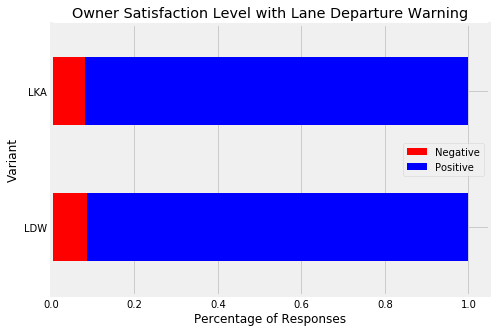

In [19]:
plot_adas_crosstabs(lane_ct, 'Lane Departure Warning')

#### Front System

In [20]:
front_ct = pd.crosstab(adas_df['Front_System'], adas_df['Sat_Front'])
front_ct

Sat_Front,Negative,Positive
Front_System,,
AEB,168,4369
FCW,76,1015


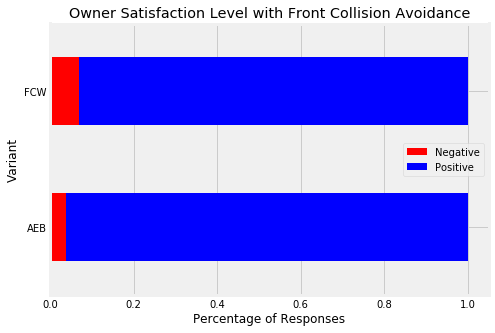

In [21]:
plot_adas_crosstabs(front_ct, 'Front Collision Avoidance')

#### Rear System

In [22]:
rear_ct = pd.crosstab(adas_df['Rear_System'], adas_df['Sat_Rear'])
rear_ct

Sat_Rear,Negative,Positive
Rear_System,,
Rear AEB,50,1955
Rear Camera,41,700
Rear Warn,94,3824


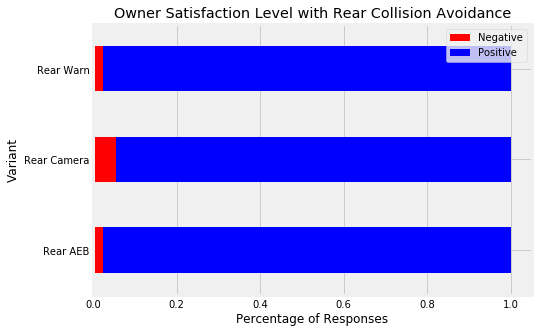

In [23]:
plot_adas_crosstabs(rear_ct, 'Rear Collision Avoidance')

#### Cruise Control

In [24]:
cruise_ct = pd.crosstab(adas_df[adas_df['Cruise']!='DNS']['Cruise'], adas_df[adas_df['Cruise']!='DNS']['Sat_Cruise'])
cruise_ct

Sat_Cruise,Negative,Positive
Cruise,,
ACC,75,2376
ACC Stop,80,2635
Cruise Only,46,1623


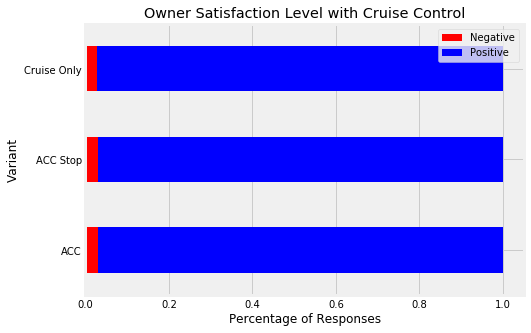

In [25]:
plot_adas_crosstabs(cruise_ct, 'Cruise Control')

#### Blind spot

Here we have to do something different since there's only one variant.

In [26]:
adas_df['Sat_BlindSpot'].value_counts()

Positive    6065
Negative     193
Name: Sat_BlindSpot, dtype: int64

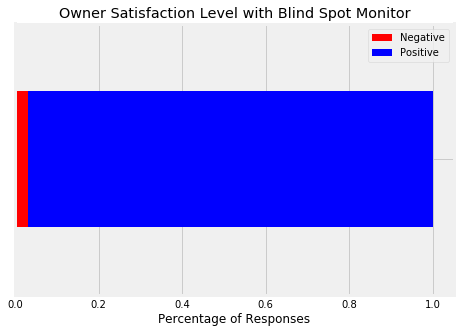

In [27]:
bs_sat = pd.DataFrame(adas_df['Sat_BlindSpot'].value_counts(normalize=True)).T
ax =  bs_sat.iloc[:, ::-1].plot.barh(stacked=True, color=['Red', 'Blue'], figsize=(7,5))
ax.set_yticklabels('')
plt.xlabel('Percentage of Responses')
plt.title('Owner Satisfaction Level with Blind Spot Monitor')
plt.legend(title='');

We can see that, no matter the ADAS, respondents overwhelmingly report positive experiences. There are some clear additional levels of negative reported experiences with lower level of automation variants:

* For **Lane Departure Warning** systems, more dissatisfaction was expressed for LDW (which only provided warnings by alert) compared to LKA (which also provided automated intervention for lane departures)
* For **Front Collision Avoidance** systems, more dissatisfcation was expressed for FCW (which only provided an alert) compared to AEB (which also provided automated front braking)
* For **Rear Collision Avoidance** systems, more dissatisfaction was expressed for the Rear Camera (which only consisted of just that) compared to the Rear Warn (providing a camera plus a warning system) and Rear AEB (which also included a warning system and automated rear braking)

### Part 2: Analysis by Make

We will look only at the top 15 of the 34 unique makes (this is a mostly arbitrary cutoff but let's look below at the counts for each of these makes):

In [28]:
adas_df['MakeName'].value_counts()[:15]

Toyota           1549
Subaru           1464
Honda             640
Ford              454
Chevrolet         445
Audi              378
Hyundai           242
BMW               239
Tesla             198
Mazda             186
Lexus             184
Kia               173
Volkswagen        153
Mercedes-Benz     152
Nissan            137
Name: MakeName, dtype: int64

In [29]:
137/adas_df.shape[0]

0.0179413305395495

So by even including the top 15, we've already gone as far as including makes which make up less than 2% of the total sample as it is. Now, let's look at the satisfaction ratings by make across ALL ADAS types (this is not exactly the most elegant way to accomplish this to be sure).

Let's start with the helper functions below to only get the most frequent makes (and later models). The first of these `df_top_n_brands` will make a dataframe out of the top n makes or models. The second `df_all_adas_brand` will take the satisfaction rating counts over all ADAS types by make or model. The third `plot_ct_top` will plot the crosstab percentages sorted in descending order by a particular column.

In [30]:
def df_top_n_brands(df, n, brand):
    tmp = pd.DataFrame(df[brand].value_counts()[:n]).reset_index().rename(columns={brand: 'Total', 'index': brand})
    brands = list(tmp[brand])
    return df.loc[df[brand].isin(brands)].reset_index()

In [31]:
def df_all_adas_brand(df, brand):
    a = pd.crosstab(df[brand], df['Sat_Lane'])
    b = pd.crosstab(df[brand], df['Sat_Front'])
    c = pd.crosstab(df[brand], df['Sat_Rear'])
    d = pd.crosstab(df[brand], df['Sat_BlindSpot'])
    e = pd.crosstab(df[brand], df['Sat_Cruise'])
    return a+b+c+d+e

In [32]:
def plot_ct_top_n(df, by, n):
    df.apply(lambda r: r/r.sum(), axis=1).sort_values(by, ascending=False)[:n].plot.barh(stacked=True, color=['red', 'blue'], figsize=(10,10)).invert_yaxis()
    plt.xlim(0,1.2)
    plt.xticks(np.arange(0,1.2, .2));
    plt.xlabel('Percentage of Responses')
    plt.legend(title='')

In [33]:
adas_topmakes = df_top_n_brands(adas_df, 15, 'MakeName')

In [34]:
by_make_all = df_all_adas_brand(adas_topmakes, 'MakeName')

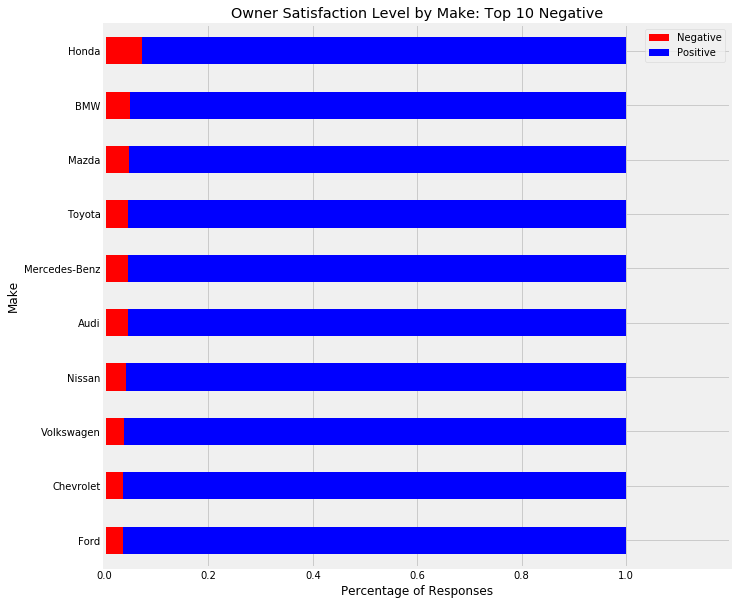

In [35]:
plot_ct_top_n(by_make_all, 'Negative', 10)
plt.ylabel('Make')
plt.title('Owner Satisfaction Level by Make: Top 10 Negative');

Seems quite clear that Honda leads in reported negative experiences here. Let's just take a quick look now at each individual ADAS by make (I could have made another helper function here to cut down on copy/pasting).

In [36]:
pd.crosstab(adas_topmakes['MakeName'], adas_topmakes['Sat_Lane'], normalize='index').sort_values('Negative', ascending=False)

Sat_Lane,Negative,Positive
MakeName,,
Honda,0.127542,0.872458
Ford,0.105769,0.894231
BMW,0.104396,0.895604
Mazda,0.103896,0.896104
Toyota,0.092025,0.907975
Mercedes-Benz,0.086957,0.913043
Lexus,0.083832,0.916168
Chevrolet,0.067308,0.932692
Audi,0.067010,0.932990


In [37]:
pd.crosstab(adas_topmakes['MakeName'], adas_topmakes['Sat_Front'], normalize='index').sort_values('Negative', ascending=False)

Sat_Front,Negative,Positive
MakeName,,
Honda,0.097222,0.902778
Audi,0.068249,0.931751
Mazda,0.067114,0.932886
Ford,0.050228,0.949772
Kia,0.048544,0.951456
Toyota,0.044410,0.955590
Volkswagen,0.044248,0.955752
Chevrolet,0.041284,0.958716
Mercedes-Benz,0.039683,0.960317


In [38]:
pd.crosstab(adas_topmakes['MakeName'], adas_topmakes['Sat_Rear'], normalize='index').sort_values('Negative', ascending=False)

Sat_Rear,Negative,Positive
MakeName,,
BMW,0.060748,0.939252
Audi,0.047619,0.952381
Mercedes-Benz,0.045455,0.954545
Honda,0.043564,0.956436
Nissan,0.036364,0.963636
Chevrolet,0.031088,0.968912
Subaru,0.024316,0.975684
Toyota,0.022676,0.977324
Volkswagen,0.022388,0.977612


In [39]:
pd.crosstab(adas_topmakes['MakeName'], adas_topmakes['Sat_BlindSpot'], normalize='index').sort_values('Negative', ascending=False)

Sat_BlindSpot,Negative,Positive
MakeName,,
Tesla,0.099448,0.900552
Nissan,0.054545,0.945455
Volkswagen,0.053030,0.946970
BMW,0.047619,0.952381
Honda,0.045175,0.954825
Mazda,0.033898,0.966102
Ford,0.032143,0.967857
Audi,0.028329,0.971671
Chevrolet,0.027864,0.972136


In [40]:
pd.crosstab(adas_topmakes['MakeName'], adas_topmakes['Sat_Cruise'], normalize='index').sort_values('Negative', ascending=False)

Sat_Cruise,Negative,Positive
MakeName,,
Honda,0.053068,0.946932
Mercedes-Benz,0.044118,0.955882
Toyota,0.042735,0.957265
Nissan,0.040650,0.959350
Mazda,0.029412,0.970588
Chevrolet,0.029268,0.970732
Volkswagen,0.028777,0.971223
Audi,0.025788,0.974212
Lexus,0.024096,0.975904


We can see that Honda "leads" for 3 different ADAS types and is "top 5" for the other 2. Just by a little inspection, you can also see no other make is in the "top 5" any more than 3 times. Let's look a bit deeper into Honda now.

### Part 3: Honda deep dive

First, let's take a look at only the Honda respondents and take a look at the frequency of each Honda model.

In [41]:
honda = adas_df[adas_df['MakeName'] == 'Honda'].reset_index()
honda['Model'].value_counts(normalize=True)

Accord           0.296875
Odyssey          0.229687
Ridgeline        0.146875
Pilot            0.090625
Civic            0.089063
Fit              0.060937
Clarity          0.053125
Accord Hybrid    0.032813
Name: Model, dtype: float64

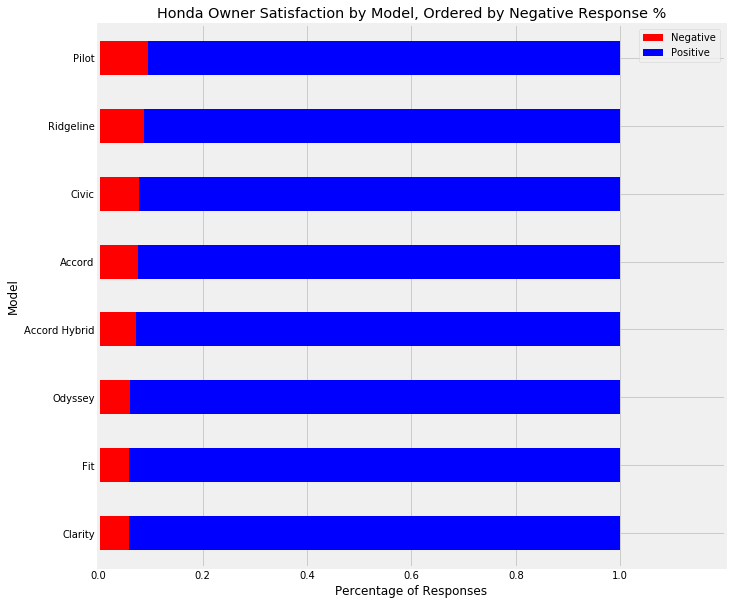

In [42]:
all_honda = df_all_adas_brand(honda, 'Model')
plot_ct_top_n(all_honda, 'Negative', len(all_honda))
plt.title('Honda Owner Satisfaction by Model, Ordered by Negative Response %');

We see that Pilot, Ridgeline, Civic, and Accord are the 4 Honda models with the highest reported negative experience. These are 4 of the 5 most frequent Honda models in the sample.

Now, taking a look by each individual ADAS type:

#### Lane Departure Warning

In [43]:
honda1 = pd.crosstab(honda['Model'], honda['Sat_Lane'], normalize='index')
honda1.sort_values('Negative', ascending=False)

Sat_Lane,Negative,Positive
Model,,
Ridgeline,0.174603,0.825397
Pilot,0.150000,0.850000
Accord,0.149733,0.850267
Accord Hybrid,0.142857,0.857143
Fit,0.121212,0.878788
Civic,0.105263,0.894737
Odyssey,0.103448,0.896552
Clarity,0.000000,1.000000


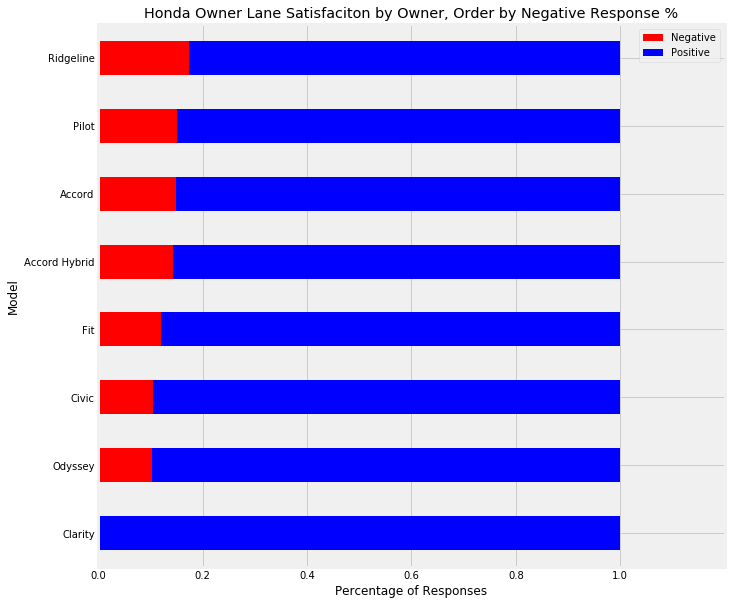

In [44]:
plot_ct_top_n(honda1, 'Negative', len(honda1))
plt.title('Honda Owner Lane Satisfaciton by Owner, Order by Negative Response %');

#### Front Collision Avoidance

In [45]:
honda2 = pd.crosstab(honda['Model'], honda['Sat_Front'], normalize='index')
honda2.sort_values('Negative', ascending=False)

Sat_Front,Negative,Positive
Model,,
Accord Hybrid,0.166667,0.833333
Pilot,0.125000,0.875000
Ridgeline,0.125000,0.875000
Fit,0.107143,0.892857
Accord,0.090909,0.909091
Odyssey,0.090226,0.909774
Civic,0.071429,0.928571
Clarity,0.032258,0.967742


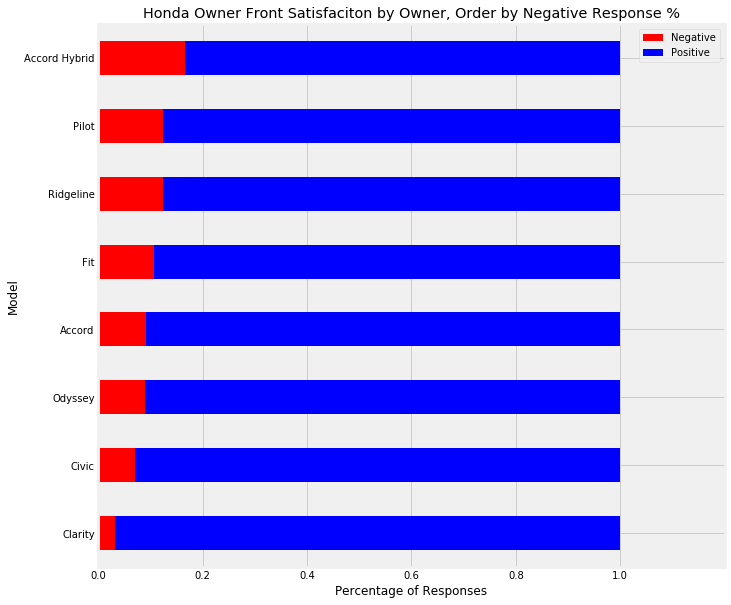

In [46]:
plot_ct_top_n(honda2, 'Negative', len(honda2))
plt.title('Honda Owner Front Satisfaciton by Owner, Order by Negative Response %');

#### Rear Collision Avoidance

In [47]:
honda3 = pd.crosstab(honda['Model'], honda['Sat_Rear'], normalize='index')
honda3.sort_values('Negative', ascending=False)

Sat_Rear,Negative,Positive
Model,,
Clarity,0.111111,0.888889
Civic,0.100000,0.900000
Pilot,0.088889,0.911111
Accord,0.048193,0.951807
Odyssey,0.031746,0.968254
Ridgeline,0.012987,0.987013
Accord Hybrid,0.000000,1.000000
Fit,0.000000,1.000000


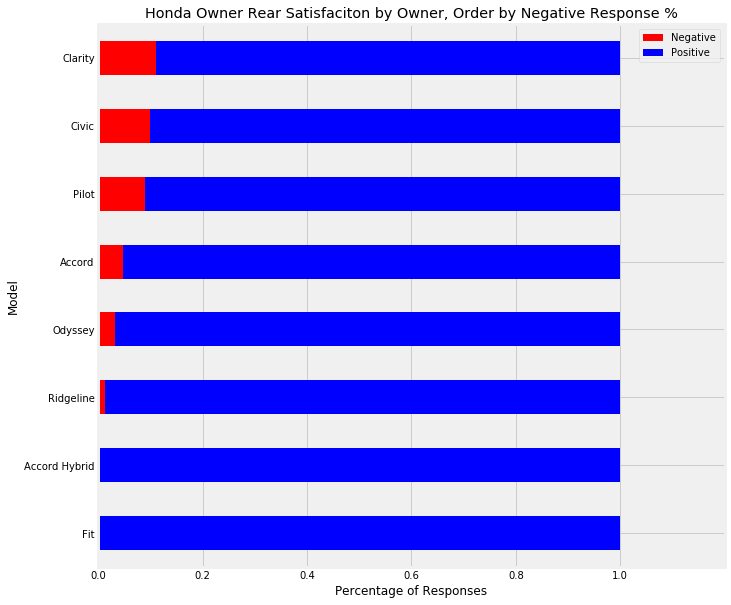

In [48]:
plot_ct_top_n(honda3, 'Negative', len(honda3))
plt.title('Honda Owner Rear Satisfaciton by Owner, Order by Negative Response %');

#### Cruise Control

In [49]:
honda4 = pd.crosstab(honda['Model'], honda['Sat_Cruise'], normalize='index')
honda4.sort_values('Negative', ascending=False)

Sat_Cruise,Negative,Positive
Model,,
Clarity,0.088235,0.911765
Ridgeline,0.079545,0.920455
Civic,0.074074,0.925926
Pilot,0.055556,0.944444
Accord Hybrid,0.052632,0.947368
Odyssey,0.041667,0.958333
Accord,0.039548,0.960452
Fit,0.030303,0.969697


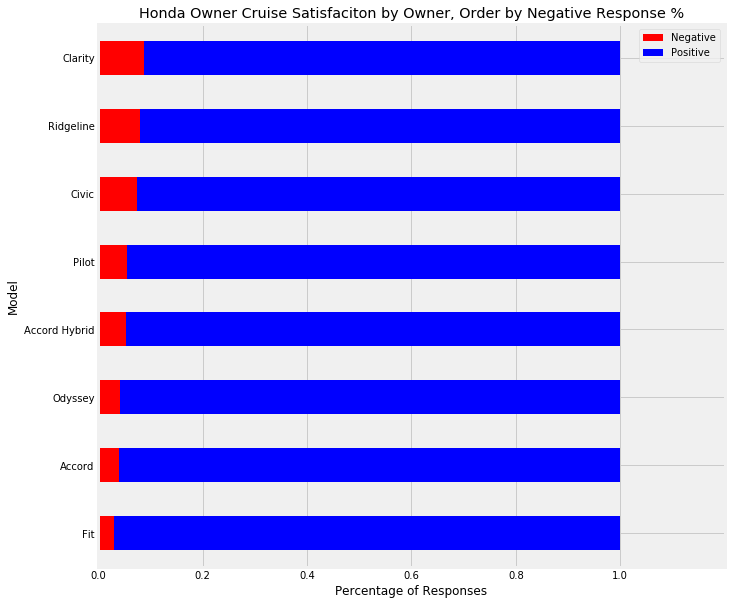

In [50]:
plot_ct_top_n(honda4, 'Negative', len(honda4))
plt.title('Honda Owner Cruise Satisfaciton by Owner, Order by Negative Response %');

#### Blind Spot 

In [51]:
honda5 = pd.crosstab(honda['Model'], honda['Sat_BlindSpot'], normalize='index')
honda5.sort_values('Negative', ascending=False)

Sat_BlindSpot,Negative,Positive
Model,,
Clarity,0.100000,0.900000
Ridgeline,0.070423,0.929577
Pilot,0.064516,0.935484
Accord,0.043750,0.956250
Civic,0.041667,0.958333
Odyssey,0.034483,0.965517
Accord Hybrid,0.000000,1.000000
Fit,0.000000,1.000000


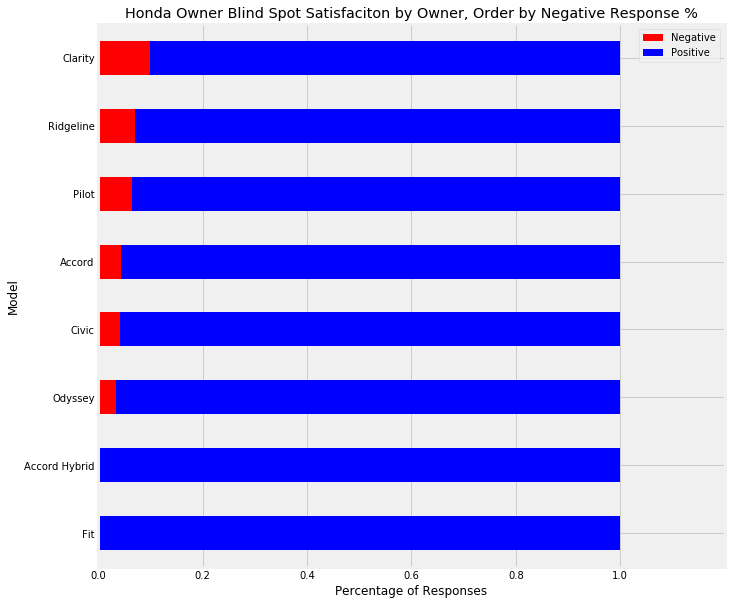

In [52]:
plot_ct_top_n(honda5, 'Negative', len(honda5))
plt.title('Honda Owner Blind Spot Satisfaciton by Owner, Order by Negative Response %');

We see that in addition to the Honda models mentioned earlier, the models Clarity and Accord Hybrid also are associated with a rate of reported negative experiences which stand out. Clarity "leads" for 3 ADAS types and Accord Hybrid for 1.

Now to take a look at all models.

### Part 4: Analysis by Model

As with makes, I'm arbitrarily zeroing in on the top 25 most frequent of the 246 unique models:

In [53]:
adas_df['Model'].value_counts()[:25]

Outback         595
Forester        569
Highlander      292
RAV4            254
Camry           248
Accord          190
Equinox         164
Q5              153
Model 3         153
Crosstrek       147
Camry Hybrid    147
Odyssey         147
F-150           134
RAV4 Hybrid     123
Pacifica        102
Ridgeline        94
CX-5             93
Escape           92
Legacy           90
Prius            82
Q7               81
X3               80
Corolla          75
RX               66
Edge             65
Name: Model, dtype: int64

In [54]:
65/adas_df.shape[0]

0.008512310110005238

So, by considering just the 25 most frequent models in the sample, we're already looking at models which make up less than 1% of the sample. Moving on now to look over all ADAS types by model:

In [55]:
adas_topmods = df_top_n_brands(adas_df, 25, 'Model')

In [56]:
by_mods_all = df_all_adas_brand(adas_topmods, 'Model')

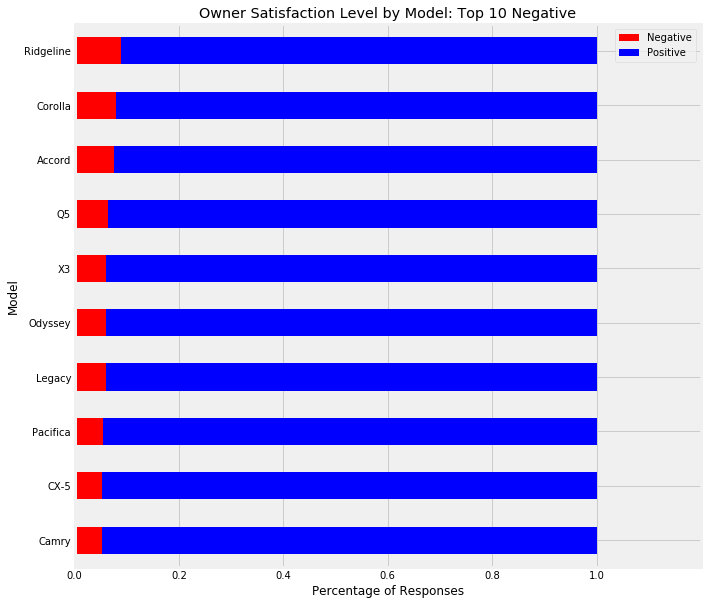

In [57]:
plot_ct_top_n(by_mods_all, 'Negative', 10)
plt.title('Owner Satisfaction Level by Model: Top 10 Negative');

Outside of the Honda models we already looked at, (Toyota) Corolla appears to have the most frequently reported negative experiences across all ADAS types, and certainly stands out the most. 

Let's now look at each ADAS type individually.

#### Lane Departure Warning

In [58]:
mod_lane = pd.crosstab(adas_topmods['Model'], adas_topmods['Sat_Lane'], normalize='index')
mod_lane.sort_values('Negative', ascending=False)

Sat_Lane,Negative,Positive
Model,,
Ridgeline,0.174603,0.825397
X3,0.166667,0.833333
Accord,0.149733,0.850267
Pacifica,0.144928,0.855072
Legacy,0.111111,0.888889
RAV4 Hybrid,0.109244,0.890756
Corolla,0.104478,0.895522
Q5,0.104478,0.895522
Odyssey,0.103448,0.896552


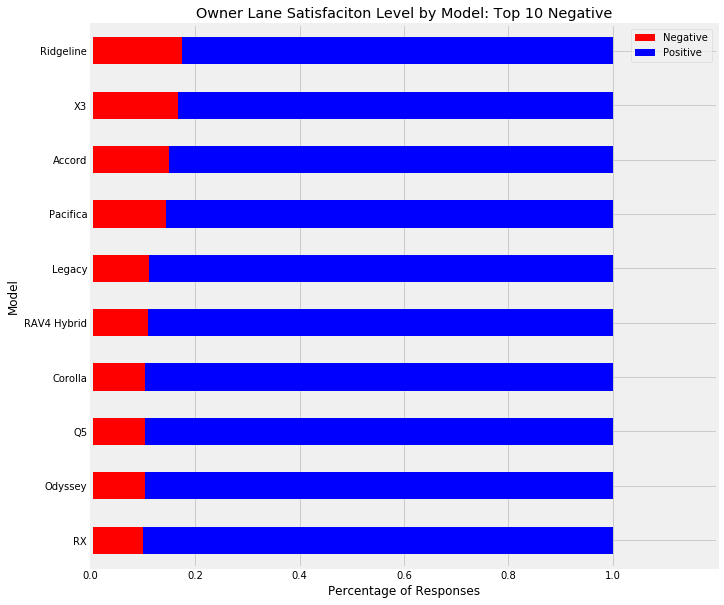

In [59]:
plot_ct_top_n(mod_lane, 'Negative', 10)
plt.title('Owner Lane Satisfaciton Level by Model: Top 10 Negative');

#### Front Collision Avoidance

In [60]:
mod_front = pd.crosstab(adas_topmods['Model'], adas_topmods['Sat_Front'], normalize='index')
mod_front.sort_values('Negative', ascending=False)

Sat_Front,Negative,Positive
Model,,
Ridgeline,0.125000,0.875000
Q5,0.107143,0.892857
Accord,0.090909,0.909091
Odyssey,0.090226,0.909774
Legacy,0.064935,0.935065
CX-5,0.061728,0.938272
Escape,0.061224,0.938776
Camry,0.053812,0.946188
RAV4,0.044118,0.955882


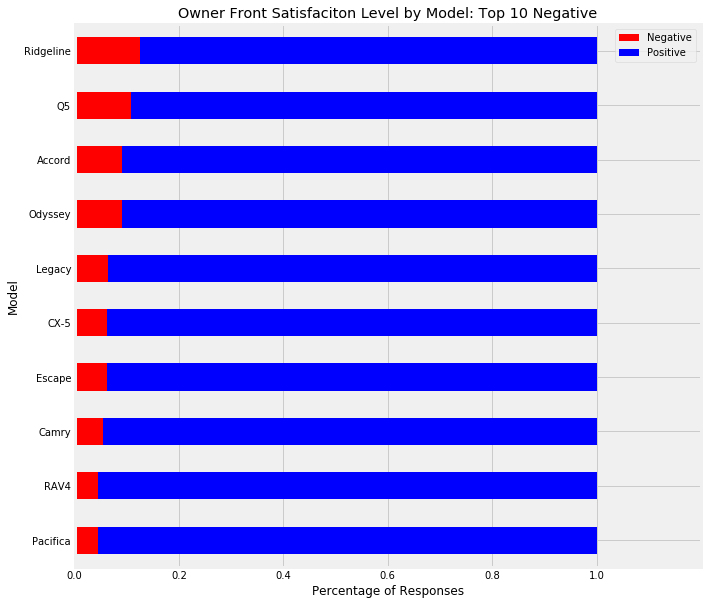

In [61]:
plot_ct_top_n(mod_front, 'Negative', 10)
plt.title('Owner Front Satisfaciton Level by Model: Top 10 Negative');

#### Rear Collision Avoidance

In [62]:
mod_rear = pd.crosstab(adas_topmods['Model'], adas_topmods['Sat_Rear'], normalize='index')
mod_rear.sort_values('Negative', ascending=False)

Sat_Rear,Negative,Positive
Model,,
Q5,0.074830,0.925170
X3,0.066667,0.933333
Accord,0.048193,0.951807
Corolla,0.043478,0.956522
Prius,0.040000,0.960000
Camry,0.032258,0.967742
Odyssey,0.031746,0.968254
Pacifica,0.030612,0.969388
Outback,0.026882,0.973118


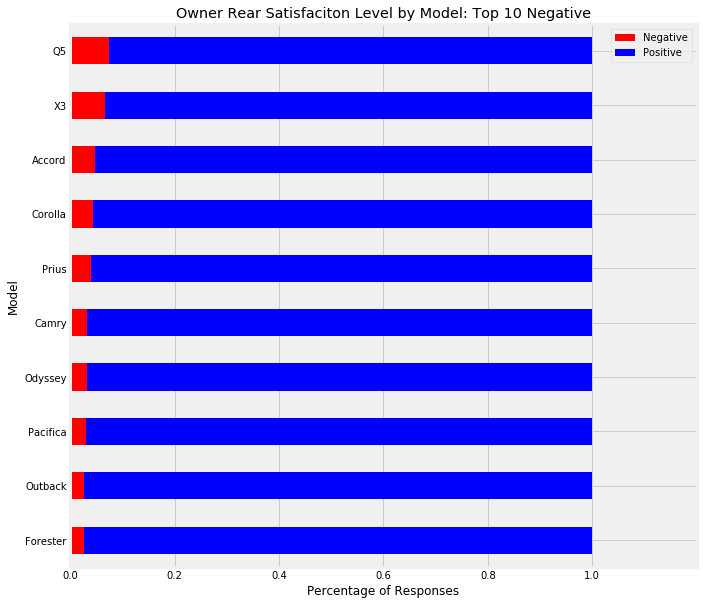

In [63]:
plot_ct_top_n(mod_rear, 'Negative', 10)
plt.title('Owner Rear Satisfaciton Level by Model: Top 10 Negative');

#### Blind Spot

In [64]:
mod_bs = pd.crosstab(adas_topmods['Model'], adas_topmods['Sat_BlindSpot'], normalize='index')
mod_bs.sort_values('Negative', ascending=False)

Sat_BlindSpot,Negative,Positive
Model,,
Corolla,0.333333,0.666667
Model 3,0.092857,0.907143
Ridgeline,0.070423,0.929577
Escape,0.058824,0.941176
CX-5,0.055556,0.944444
Legacy,0.047059,0.952941
Accord,0.043750,0.956250
X3,0.040541,0.959459
Camry,0.036458,0.963542


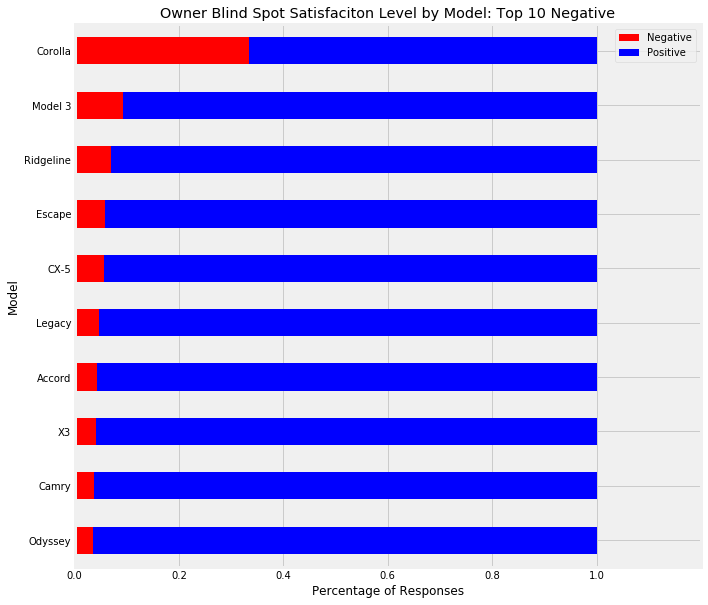

In [65]:
plot_ct_top_n(mod_bs, 'Negative', 10)
plt.title('Owner Blind Spot Satisfaciton Level by Model: Top 10 Negative');

#### Cruise Control

In [66]:
mod_cruise = pd.crosstab(adas_topmods['Model'], adas_topmods['Sat_Cruise'], normalize='index')
mod_cruise.sort_values('Negative', ascending=False)

Sat_Cruise,Negative,Positive
Model,,
Corolla,0.098361,0.901639
Ridgeline,0.079545,0.920455
RAV4,0.061674,0.938326
Pacifica,0.060000,0.940000
Camry,0.054545,0.945455
Legacy,0.049383,0.950617
Odyssey,0.041667,0.958333
Highlander,0.039855,0.960145
Accord,0.039548,0.960452


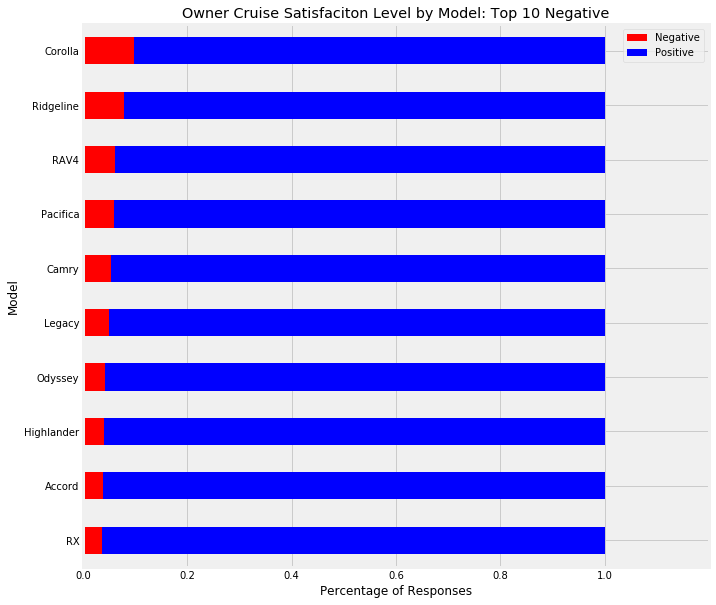

In [67]:
plot_ct_top_n(mod_cruise, 'Negative', 10)
plt.title('Owner Cruise Satisfaciton Level by Model: Top 10 Negative');

Corolla "leads" for both Cruise Control and Blind Spot (with a ridiculous 33% negative reported experiences!), while also having some of the more frequently reported negative experiences for Lane Departure Warning (7th highets, 5th with no Honda models) and Front Collision Avoidance (4th highest, 3rd ignoring Honda Models).

Audi Q5 and BMW X3 also figure heavily here. They have the two highest frequencies of reported negative experiences for Rear Collision Avoidance, while Q5 "leads" for Front Collision Avoidance and X3 for Lane Departure Warning (excluding Honda Ridgeline).

# Basic Text Analysis

To understand what features of each system driving negative/positive ratings, I performed some very basic analysis of the free text responses in the columns `Verbatim_[System_Type]`. For each system type, I did the following:

* Applied `TfidfVectorizer` to convert each respondent comment (Positive or Negative) into a vector representation of the "intensity" (tf-idf weight) of individual words/phrases associated with a given comment. I chose `TfidfVectorizer` over `CountVectorizer` in the hopes of both more generic and more rare sources of satisfaction/dissatisfaction with a given system type.
* Separated the comments into Positive and Negative, and for each level of satisfaction identifed the 10 words/phrases with the highest average tf-idf weight
* Plotted, for each satisfaction level, the "top 10" words/phrases in order of descending average tf-idf weight

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
stop_words=list(set(stopwords.words("english")))

First, I'll create a few helper functions to accomplish the above. The function `get_feedback_tfidf` will return the tf-idf matrix -- augmented with each respondent's reported free text response and satisfaction level -- of all words/phrases across all respondent comments for the (ADAS) system type specified in the argument, from the original dataframe of survey responses (`adas_df`). There are a number of arguments with default values to be passed to `TfidfVectorizer` -- note that by default phrases considered for vectorization will be between 2-4 words. Depending on the system type, some `stop_words` will be added -- this might help eliminate phrases with words that are uninformative but might still appear frequently (particularly those related to the name of the system type itself).

Second, the function `plot_top_n_phrases` gets the top `n` phrases -- from output of `get_feedback_tfidf` -- for a given system type and satisfaction level (`sat`) and plots them. 

Finally, `print_comments_for_phrase` returns the verbatim free text responses for a given satisfaction level (`sat`) which "contains" a specified phrase (by positive tf-idf weight) from an input dataframe which has each free text response, satisfaction level, and tf-idf weights for a given system type.

In [69]:
def get_feedback_tfidf(df, system, stop_words=set(stopwords.words("english")), token="\\b[a-z][a-z]+\\b", ngram_min=2, ngram_max=4, min_df=2, max_df=.85):
    sat_string = 'Sat_' + system
    feed_string = 'Verbatim' + system
    feedback_df = df[[sat_string, feed_string]].dropna().reset_index().drop(columns='index')
    
    stop_words.update(['works', 'work', 'well', 'great', 'good', 'system', 'fine'])
    if system=='BlindSpot':
        stop_words.update(['blindspot', 'blindspots', 'blind', 'spot', 'spots'])
    if system == 'Cruise':
        stop_words.update(['cruise'])
    
    vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(ngram_min, ngram_max), token_pattern=token, min_df=min_df, max_df=max_df)
    vector = vectorizer.fit_transform(feedback_df[feed_string])
    
    tfidf_df = pd.DataFrame(vector.todense(), columns=vectorizer.get_feature_names(), index=feedback_df[sat_string]).reset_index()
    tfidf_df = tfidf_df.rename(columns={sat_string: 'Feedback'})
    tfidf_df['Comment'] = feedback_df[feed_string]
    return tfidf_df

In [70]:
def plot_top_n_phrases(df, system, sat, n):
    
    top_n_df = df.groupby('Feedback').mean().T[[sat]].nlargest(n, sat)
    top_n_df.plot.barh(figsize=(7,5)).invert_yaxis()
    
    system_plot_strings = {'Lane': 'Lane Departure Warning',
                          'Front': 'Front Collision Avoidance',
                          'Rear': 'Rear Collision Avoidance',
                          'BlindSpot': 'Blind Spot Monitor',
                          'Cruise': 'Cruise Control'}
    
    plt.legend([])
    plt.xlabel('Average Weight')
    plt.title('Highest Intensity Phrases for ' + sat + ' Responses, ' + system_plot_strings[system])

In [71]:
def print_comments_for_phrase(df, sat, phrase):
    idxs = df[(df['Feedback'] == sat)&(df[phrase] > 0)].index.tolist()
    for n in idxs:
        print(df.iloc[n]['Comment'])
        print('\r')

Now we can examine the free text responses for each system type! I will be going into detail with my analysis for the very first system type, Lane Departure Warning. For the remaining system types I will be providing the plots, summaries, and one example of the full respondent comments for a given phrase or two for both the positive and negative feedback.

#### Lane Departure Warning

In [72]:
lane_feed = get_feedback_tfidf(adas_df, 'Lane')

*Positive Feedback*

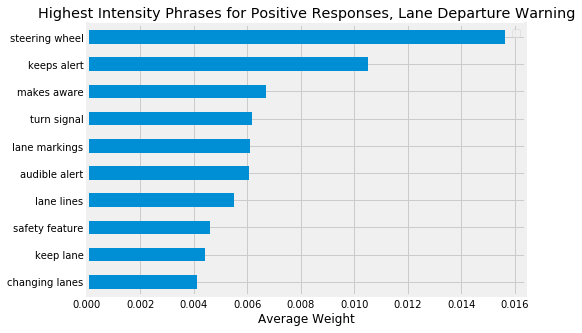

In [73]:
plot_top_n_phrases(lane_feed, 'Lane', 'Positive', 10)

Even though not all these phrases make clear what left respondents satisfied with the Lane Departure Warning system, it does appear that respondents liked that the system helped them maintain situational awareness ("makes aware", "keeps alert") regarding their own and others' driving and safety practices including signaling ("turn signal"). These favorable outcomes appear to be accomplished through tactile ("steering wheel") and audible alerts ("audible alerts"), and the system is viewed as most favorable under conditions it is designed for -- such as when lane markings are clear ("lane markings").

See below for full respondent comments associated with some of these phrases:

In [74]:
print_comments_for_phrase(lane_feed, 'Positive', 'steering wheel')

It only stays on for about 12 seconds and then I get a message to steer with the steering wheel

The vibration of the steering wheel is OK.  The corrective steering action seems to guide toward vs away from path.   I get used to it but is not as effective for me as BMW system.

the slight change in the steering wheel that lets you know

I like the steering wheel vibration when drifting out of my lane.

Good: vibration in steering wheel if crossing line; no distracting beep.

Takes away from the feel of the steering wheel. Makes car seem less responsive

Don't like the response to the steering wheel

Must keep hand on the steering wheel to keep it active.  I am not very satisfied with its ability to keep me in the lane as it seems to wander out at time.  Mostly it does not seem to be very consistent

Vibration in the steering wheel is very effective when you get too close to the line.

It is so sensitive that at times its very annoying as we all at times cross the line by a couple inche

Seems very effective.  Steering wheel vibrates

The steering wheel vibrates and give me a message in my dash.  Nice to know when I am going over a line

Overall happy with LKAS. One observations is that lane keeping assist sometimes is triggered on poorly striped roads or lanes with irregular pavement, not paint. I've learned to ignore brief steering wheel vibration and adjustment, but it is disconcerting.

The steering wheel shake is annoying.

The immediate feedback thriough the steering is excellent. Being a degreed engineer (EE) - who cannot type, I am intrigued by technical innovation; I enjoy showing other people what it does & how it provides feedback info through the steering wheel & display on the instrument panel - no audible alert.

I feel that the system beeps a little bit early. The steering wheel will push a little bit when there is an off-ramp.

Shakes steering wheel.

I do not use it as it jerks the steering wheel

System alerts by tug on steering wheel.  Can be annoyin

In [75]:
print_comments_for_phrase(lane_feed, 'Positive', 'turn signal')

makes it difficult to steer into another lane without using turn signal

It makes you remember to use your turn signal to notify others when you plan to change lanes.  It doesn't necessarily understand when you are turning at a corner where multiple lanes turn.

Good that it puts a resistance on the steering wheel when you cross a lane line without your turn signal on.

the lane keep assist feature can be turned off with a button at the end of the turn signal stalk. It is a very convenient feature where I can turn it off in a moment's notice, like when I drive through a construction zone where the lane markings can be a bit confusing.

Works well. Need to remember to use turn signal when passing or wheel will fight you. Does not work on poorly marked roads and needs to be watched when going past freeway exits.

It forces you to always use the turn signal when changing lanes, otherwise, it will fight you when you try to change lanes since it thinks you are drifting by mistake.

glad it 

In [76]:
print_comments_for_phrase(lane_feed, 'Positive', 'lane markings')

I'm reluctant to use it regularly because in urban driving there are many places were the lane markings are unclear and seem to affect the reliability of the feature.  I would be more inclined to use it on long freeway driving.

Good: it works well when it can see the lane markings. Bad: There are many situations where it cannot see the lane markings. It only works at >42mph (>70kph).

the lane keep assist feature can be turned off with a button at the end of the turn signal stalk. It is a very convenient feature where I can turn it off in a moment's notice, like when I drive through a construction zone where the lane markings can be a bit confusing.

The self steering functionality allows the car to "pin ball" from edge-to-edge of the lane. Also, the system will unexpectedly "loose" the lane markings and then it's not able to accurately steer the vehicle.  BTW:   BMW's system is NOT as effective as the same function in the 2015 Mercedes C-Class.

system does not usually center and som

Note that not all the comments appear to show as much satisfaction as the respondent may have indicated. We might want to check if a mistake was made, perhaps with dataframe manipulation by looking at examples using the "master" dataframe `adas_df`.

In [77]:
adas_df[adas_df['VerbatimLane'] == 'system does not usually center and sometimes crosses over the line.  System often inexplicably turns off when the lane markings seem identical.']

,Respondent ID,Year,MakeName,Model,Lane_System,Sat_Lane,VerbatimLane,Front_System,Sat_Front,VerbatimFront,Sat_BlindSpot,VerbatimBlindSpot,Rear_System,Sat_Rear,VerbatimRear,Cruise,Sat_Cruise,VerbatimCruise
563,10256700003106000,2018,BMW,5 Series,LKA,Positive,system does not usually center and sometimes c...,FCW,NaN,NaN,Positive,Very good BUT I would prefer to see it in the ...,Rear AEB,Positive,works well. Display is crystal clear. Not al...,ACC Stop,Positive,NaN


*Negative Feedback*

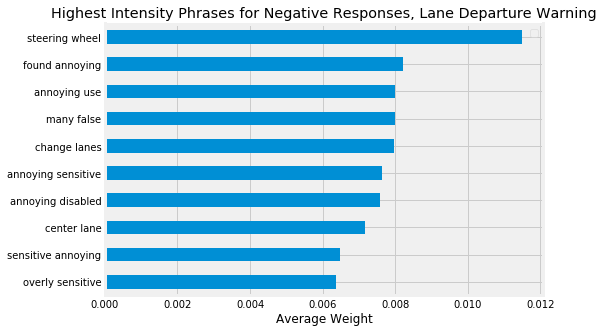

In [78]:
plot_top_n_phrases(lane_feed, 'Lane', 'Negative', 10)

In [79]:
print_comments_for_phrase(lane_feed, 'Negative', 'center lane')

It is sensitive and if you go to one side of the lane to create a space cushion while next to a large vehicle it will sound off repeatedly until you return to the center of your lane.

It’s overly sensitive and will tell you you are not in the center of the lane even though you are up for a long for an extended period of time.

Doesn't keep car in center of lane. Car will wander from one side of the lane to the other.

It doesn't center you in the lane. It nudges you back into your lane only.

System wil not center in the lane. The car will wonder from side to side

Doesn't keep you in the center of the lane, keeps you a little right of center

tries to keep you in the center of the lane, I hate that

abrupt correction from side to side instead of keeping vehicle in center of lane then shut off. An ideal system would keep center lane smoothly, not swing from side to side.

The system is terrible, it cannot see lane markers well so it bounces around, leaves the lane, alerts you when you

In [80]:
print_comments_for_phrase(lane_feed, 'Negative', 'steering wheel')

There are two problems - first, the sound the car makes is way too loud and annoying (and cannot be modulated).  Second, there is no alternative to the loud sound - they should implement steering wheel vibration or offer less irritating sounds.

system is inconsistent so of little use. Also it gives an audible alert if I don't have a firm grip on the steering wheel - very annoying

I don't like the fact that unless you use your turn signal to indicate that you are changing lanes (even when no-one is there), I have to "fight" my steering wheel to change lanes. Also sometimes when there is road construction, it thinks that I'm changing lanes, even when I'm not.

Hate the steering wheel vibration

It does not have adequate self steering and you can easily cross the line.  The steering wheel vibration does not start until you are a good foot over the line into the next lane.  Not a satisfying system and would not prevent most out of lane accidents.

Vibration in the steering wheel make it 

In [81]:
print_comments_for_phrase(lane_feed, 'Negative', 'change lanes')

I don't like the fact that unless you use your turn signal to indicate that you are changing lanes (even when no-one is there), I have to "fight" my steering wheel to change lanes. Also sometimes when there is road construction, it thinks that I'm changing lanes, even when I'm not.

It works, but in even light traffic, where you need to change lanes for trucks and slower traffic often, it is more of a novelty than a useful feature.

the vibration gets annoying when driving a 3 lane street through town because you frequently change lanes

Pain in the butt if you want to change lanes steering gets tighter

Its noisy. I dont like it. If you change lanes without signaling (which is sometimes required in heavy traffic) it startles you.  Its as about as useful as daytime headlights.

Bad: Annoying to change lanes when no other cars around because it tries to force you back into your lane when you don't use your signal. Good: Promotes using turn signal at ALL times

I do not like when I chang

#### Front Collision Avoidance

In [82]:
front_feed = get_feedback_tfidf(adas_df, 'Front')

*Positive Feedback*

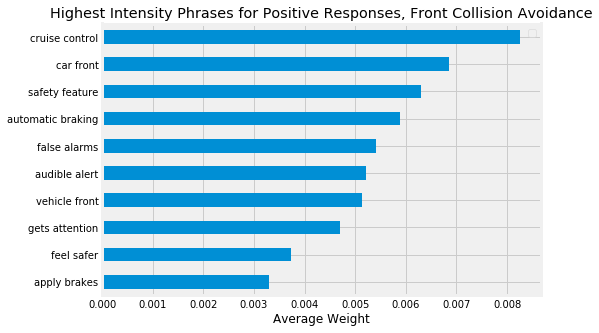

In [83]:
plot_top_n_phrases(front_feed, 'Front', 'Positive', 10)

Respondents viewed the system as helpful when cruise control is engaged and helpful in increasing awareness of cars in front ("gets attention", "car front", "vehicle front", "feel safer") through alerts over different channels ("audible alert"). Despite rating their satisifcation level as positive, these respondents do sometimes mention issues with coupling with cruise control, automatic braking and false alarms (though many report no issues). 

In [84]:
print_comments_for_phrase(front_feed, 'Positive', 'false alarms')

False alarms

Get many false alarms from this system.

It is surprisingly accurate at identifying conditions that are a real hazard (like accelerating or not braking into a slowing or stopped vehicle) while having very few (but not none) false alarms. It is sometimes overly cautious and slow to recover from a vehicle turning in front of you.

No false alarms, excellent

Some false alarms when turning

The system works has worked well so far and without any false alarms.

occasionally false alarms for close but not dangerous things

Bad: has false alarms that trigger a reaction that almost causes me to step on the brake even if there is no issue

some false alarms, especially when going around a corner.

scary when goes off Had several false alarms sometime seeing care on the other side of the road other times ?

It has a few false alarms

Competent system that seems to have less false alarms than others I have experienced.  Seems to be better at filtering out things like cars stopped o

*Negative Feedback*

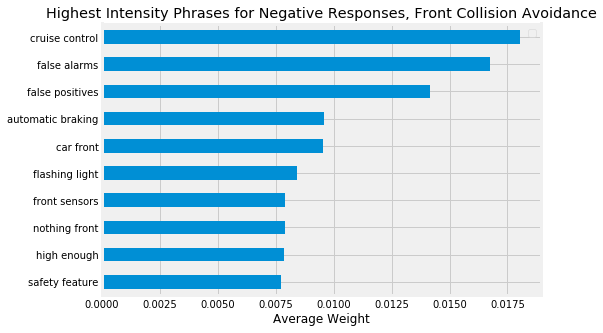

In [85]:
plot_top_n_phrases(front_feed, 'Front', 'Negative', 10)

Respondents reported issues with the system's coupling with cruise control. They also reported that the system was too agrressive with too many false alarms and could result in jarring, sudden stops ("nothing front", "automatic braking").

In [86]:
print_comments_for_phrase(front_feed, 'Negative', 'nothing front')

Alert often comes on even when there is nothing in front of car.  I'm VERY glad it does not automatically apply the brakes!

The only time it ever activated we were driving slowly thru a gate and it braked the car. There was nothing in front of us...

It often sends false alarms that I need to brake when there's nothing in front of me.  If I'm approaching another car quickly, it only activates very late - nearly when an impact is imminent.  Although I don't want more false alarms, it would be more beneficial if a progressive alarm could be activated earlier.

It sometimes works like it's suppose to other time it goes off when there is nothing in front of you, or goes off when it's too late to react.



#### Rear Collision Avoidance

In [87]:
rear_feed = get_feedback_tfidf(adas_df, 'Rear')

*Positive Feedback*

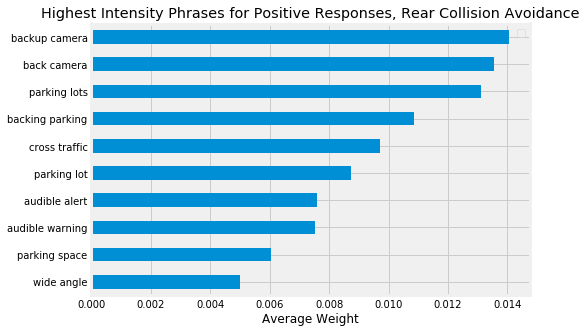

In [88]:
plot_top_n_phrases(rear_feed, 'Rear', 'Positive', 10)

Respondents reported positive experiences with the camera, particularly the wide-angle view, as well as the audible/visual alerts for supporting situations when the car needs to be reversed, like parking or dealing with cross traffic.

In [89]:
print_comments_for_phrase(rear_feed, 'Positive', 'wide angle')

So far it has alerted me in time. The rear view is wide angle and allows me to see cars when backing out of a blind parking spot.

The camera Has such a wide angle that it is hard to judge depth of field however I am getting used to it. When I’m backing up I think I still have quite a ways to go away and I only have inches

Has a very wide angle lens to pick up more objects. Does not work well when raining or snowing as camera is wet or covered with snow.

clear picture with wide angle

The view is very clear and it's a wide angle, see a lot more then other vehicles.

You get a wide-angle view of your surroundings, plus a good indication of how far you are from the nearest obstacle.

Great visual display in camera - very wide angle.

Great wide angle view

It's a good camera with a wide angle.

wide angle audio alert

Has three camera views, great for backing into a parking spot.  The wide angle view is very wide, amazingly helpful.

The camera is terrific ... wide angle and very good 

*Negative Feedback*

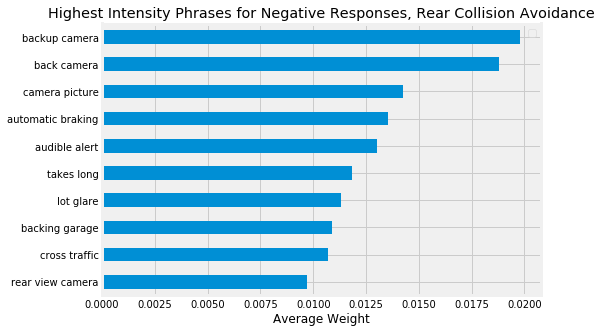

In [90]:
plot_top_n_phrases(rear_feed, 'Rear', 'Negative', 10)

Respondents reporting negative experiences also mentioned the camera but rather than praise it for helping with backing up, issues are reported for not providing clear or timely pictures ("takes long", "lot glare")

In [91]:
print_comments_for_phrase(rear_feed, 'Negative', 'backup camera')

See above comment on the front collision system - far too sensitive in parallel parking situations.  the backup camera is very useful, although it’s tough to judge how close/far away a parked car behind you is.

Unlike other brands (merc) the backup camera lens gets dirty which limits the quality of video.

The backup camera is excellent, but I feel that the side-looking radar should have longer range. Backing out of my driveway onto the residential street, if I trusted the warning system only I would be in danger of getting hit by cars moving at the speed limit.

the backup camera is off center when it should definitely be on the vehicle centerline, for example, when backing  into a garage.

good backup camera



In [92]:
print_comments_for_phrase(rear_feed, 'Negative', 'takes long')

camera takes too long to shut off.

Sometimes the system is extremely slow to respond.  I can sometimes completely back out of my driveway before the back up camera turns on.  It takes so long to boot up, that it is like not even having it there.



#### Blind Spot

In [93]:
bs_feed = get_feedback_tfidf(adas_df, 'BlindSpot')

*Positive Feedback*

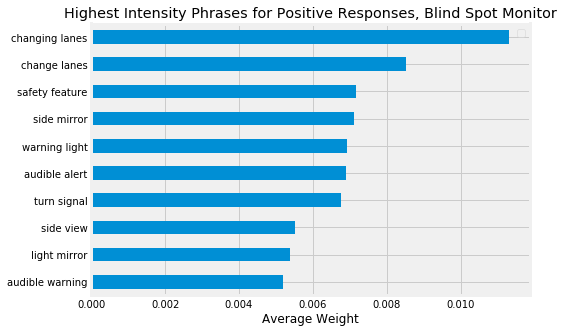

In [94]:
plot_top_n_phrases(bs_feed, 'BlindSpot', 'Positive', 10)

Respondents reported positive experiences with this system as support for changing lanes, as well as with the various features of the system including the visual alerts in the side mirror, audible alerts (when available, otherwise respondents requested it), and coupling with turn signal.

In [95]:
print_comments_for_phrase(bs_feed, 'Positive', 'audible alert')

large area coverage with audible alert  should also allow for pedestrians.  when backing up, system should also provide some sort of audible outside the vehicle to warn pedestrians

Could use an audible alert in addition to warning light

Be nice to have an audible alert in addition to the visual.

Good: very visible indicator on the side of the mirror Bads: no audible alert

If my blind Spot Monitor has an audible alert I am not aware of it. The lights are on the inside of my side mirrors and easy to see, and the intensity is adjustable.

would much prefer if it had an audible alert when turn signal activated while another vehicle is within range, rather than just blinking warning light,

Excellent BSM system, but I would welcome an audible alert as well.

wished it had an audible alert

It is very helpful, but that option should also include audible alert, as well as the fast-blinking light in the outside rear view mirror.

The lack of an audible alert annoys me.

Wish it had audible

In [96]:
print_comments_for_phrase(bs_feed, 'Positive', 'side mirror')

Would prefer that the light be on the side mirror insead of being located on the window panel.

I like the yellow triangle that pops up in the side mirror.  No obtrusive but very usable.

I like this system, I get a warning light on the side mirror if a car is in my blind spot.

Good: very visible indicator on the side of the mirror Bads: no audible alert

Warning light on side mirror isn't always obvious

I would prefer to have the light on the mirror itself because I sometimes don't see it on the side of the mirror. I'm slowly adjusting to it though.

I have limited time with this car (2000 mi's total). At low speed and higher highway speeds this system is exceptional  (compared to 2008 Escalade and 2013 Lexus RX350). Warns sooner of approaching vehicles and light in side of mirror is an attention grabber, more so than smaller light in mirror glass.

the design puts the light in the mirror on the side of the mirror instead of in it.

larger light on side mirror is large enough to be 

It's adequate, and I use it, but I would prefer a camera display for each side mirror so that I could actually see what is in the blind spots. The little blind-spot indicators on the mirror are small and somewhat distracting when I try to locate them in traffic.

As I gaze at my side mirror, I either see the yellow vehicle alert if there is a vehicle on either side/blind spot. An excellent feature.

It is hard to use, because the blind spot mirror on your side mirror is so small.

The icon on the side mirror is too small and does not catch your periphral vision easily.

I watch the warning light on the side mirror before trying to make the lane change

right there when you check side mirror before changing lanes

Lights in side mirror

Great visual in side mirror backup by flashing and audible sound if you engage turn signal in that direction. Great mix of technology.

You can tell as soon as you look in the side mirror if a vehicle is in your blind spot.

The visual on the side mirror

*Negative Feedback*

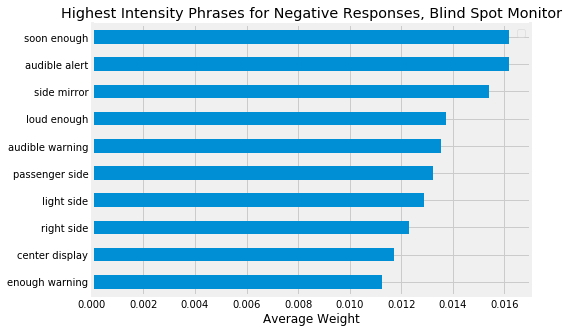

In [97]:
plot_top_n_phrases(bs_feed, 'BlindSpot', 'Negative', 10)

Respondents reporting negative experiences find the system's alerting (visual or audible) to be insufficient ("right side") or too slow or weak to be helpful ("enough warning", "loud enough", "soon enough")

In [98]:
print_comments_for_phrase(bs_feed, 'Negative', 'right side')

It is a camera picture of the right side of the car.  The picture appears in the center of the dashboard, in the "Driver Info Center",so you have to take your eyes off the road to look at it.  Not very helpful.

no audible alert and only right side

This is a real weak spot of the Clarity. Blind spot monitoring is only available for the passenger side of the car AND only engages when you turn on the right blinker signal. Then and only then do you see on the dash screen what is in the right side blind spot. THERE IS NO BLIND SPOT MONITORING WHAT SO EVER ON THE DRIVER'S SIDE OF THE CAR. We had the dealer install an aftermarket fully active blind spot monitoring system ($1000) in the vehicle. It has an amber circle beside the windshield on both sides of the car. If the amber circle lights up then something is in the blind spot. The system is overly sensitive and on the highway may pick up an approaching vehicle 2 lanes over. Better, in our opinion, to have an over sensitive system all the

In [99]:
print_comments_for_phrase(bs_feed, 'Negative', 'soon enough')

It will not worn you soon enough

There are many times when the blinking light does not kick on as soon as it should. In other words, I don't trust it fully as it does not pick up soon enough vehicles in my blind sport.

The system does not pick up vehicles soon enough to adequately warn me



#### Cruise Control

In [100]:
cruise_feed = get_feedback_tfidf(adas_df, 'Cruise')

*Positive Feedback*

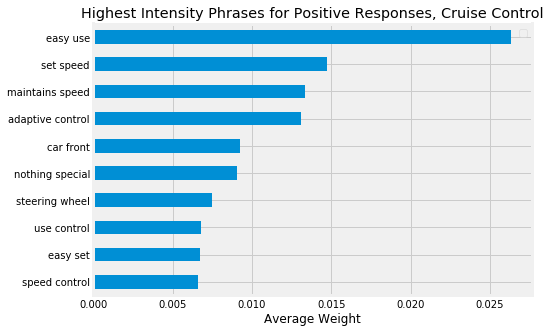

In [101]:
plot_top_n_phrases(cruise_feed, 'Cruise', 'Positive', 10)

Respondents reported that the system is easy to use and does what it should -- set and maintain speed and adjust if so designed ("adaptive control"). Despite reporting that they were satisfied, some respondents reported issues when responding to cars in front or with the coupling with the steering wheel.

In [102]:
print_comments_for_phrase(cruise_feed, 'Positive', 'car front')

Excellent. Keeping a set distance from the car in front and matching that car's speed is very helpful.

The cruise control is adaptive, working from zero mph up to full speed. The system seems to want to maintain a constant time between you and the car in front, which is the only intelligent way to design a system. The spacing (time?) to the next car can be set by the driver from very far to very close. The system works equally well on the highway as in stop/go city traffic working down to zero mph

It gives you no indication that it has gradually slowed for a car in front so you end up following a slower car you would normally pass.

Good that Adaptive cruise control keeps station with the car in front when it is slower than my cruise set speed, all the way down to a complete stop. With cruise set to 40 on a city street, and a car in front stopped at a red light, cruise has to slow too sharply IMO, but does stop in time.

Cruise control is ok but will not keep your speed when going do

In [103]:
print_comments_for_phrase(cruise_feed, 'Positive', 'steering wheel')

Controls are located poorly and require you to take your left hand off the steering wheel to adjust

Nothing really stands out.  It maintains speed, and I can adjust up or down from the steering wheel

Same as Equinox- can drive(highway) only with steering wheel control- very simple way to control speed.

It is convenient to use with controls on the steering wheel and allows the driver to concentrate on observing traffic.

The controls are on the front side of the steering wheel.

Very easy to drive only with the steering wheel control(highway) no foot control needed- including changing speed (up/down),etc

Convenient paddle switch on the steering wheel instead of the turn lever.

Somewhat awkward location on the steering wheel.

Works good, steady speed, controls on steering wheel good.

It's intuitive and easy to control from the steering wheel

It is somewhat cumbersome to use.  The various controls are too close together and difficult to access without taking a hand off the steerin

*Negative Feedback*

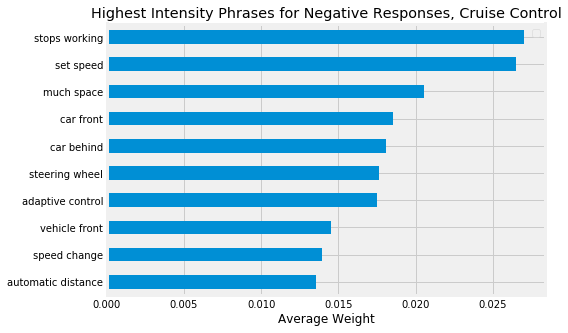

In [104]:
plot_top_n_phrases(cruise_feed, 'Cruise', 'Negative', 10)

Respondents reported negative experiences had issues with the speed and distance controls resulting in extra required adjustments, as well as with poor spacing, abrupt changes and/or poor awareness ("much space", "car front", "car behind", "set speed", "speed change"). Controls on steering wheel are also not viewed as user-friendly.

In [105]:
print_comments_for_phrase(cruise_feed, 'Negative', 'set speed')

the bad is most of the time you have to take your eyes off the road to set the speed , change the speed, or turn the system off

The system does not hold the set speed well. Also, the distance between the vehicle ahead and mine is so large, it is basically useless in heavy traffic because the distance is too large. It encourages other cars behind me to move in front, further slowing my car down.

After you have set the speed the vehicle will speed up beyond the setting and you are not aware of the speed change. I have found that the vehicle has added 5 mph to what I had set. On a winding road this could put you in jeopardy. On a straight road it could cost you a speeding ticket.

Varies too much from set speed

Don't like that it only allows to set speed in increments of 5 mph. Like that it shows in my heads up display

The cruise control buttons are easy to use.  What stands out the most is how poorly the system maintains the set speed up and down hills.

It automatically slows the ca

In [106]:
print_comments_for_phrase(cruise_feed, 'Negative', 'steering wheel')

cruise control is very user unfriendly. I have to look at left side of steering wheel everytime I need to change something on  it

Too many buttons I have to look at the steering wheel every time I use it or change a setting

Works well, but would be better if controls were on the steering wheel.

Fairly accurate and adjusts to most hills, up or down Can shift gears (manual gear box) and automatically keeps speed Too many buttons on steering wheel for the system and difficult to reach for my smaller hands.



In [107]:
print_comments_for_phrase(cruise_feed, 'Negative', 'much space')

The first problem is the follow distance is too long on the shortest setting. The gap is too big and other vehicles will constantly fill that gap, when the vehicle will then overbrake and cause a jarring ride. It’s only good for rural highways as far as I’m concerned. Maybe if it would adjust between dry weather and wet maybe that would work, as is it just leaves too much space.   The next problem is that the system overbrakes in a panic situation and it could cause the car to be rear ended. I was following a tall pickup once and they slammed on the brakes. I and the system also slammed on the brakes at they same time. As I began to lift off the pedal, the system kept up the heavy braking and made the gap too big. The car behind me was filling up my rear view mirror quickly and almost hit me. Maybe rear sensing could help this situation.

It really allows too much space between your car and a car in front of your car. Also the speed fluctuates too much even when no one is in front of y

# Notes

*Valid Satisfaction Level Responses with Null Free Text Responses*

There are some respondents who reported a satisfaction level without a free text response (maybe these respondents combined all their comments under the free text response for a single system type?). It is not clear how much more prevalent they are for Positive vs Negative responses.

In [108]:
mask = (adas_df['Sat_Lane'] == 'Positive')&(adas_df['VerbatimLane'].isnull())
adas_df[mask]

,Respondent ID,Year,MakeName,Model,Lane_System,Sat_Lane,VerbatimLane,Front_System,Sat_Front,VerbatimFront,Sat_BlindSpot,VerbatimBlindSpot,Rear_System,Sat_Rear,VerbatimRear,Cruise,Sat_Cruise,VerbatimCruise
0,10002000302469000,2018,Acura,MDX,LKA,Positive,NaN,AEB,Positive,Sometimes trucks in the next lane cause the sy...,Positive,It good when backing out of the driveway with ...,Rear Camera,Positive,NaN,ACC Stop,Positive,NaN
6,10002001902576000,2018,Acura,MDX,LKA,Positive,NaN,AEB,Positive,It sometimes will apply the brakes when steel ...,Positive,NaN,Rear Warn,Positive,NaN,ACC Stop,Positive,NaN
7,10002000193659000,2018,Acura,MDX,LKA,Positive,NaN,AEB,Positive,A few false positives,Positive,NaN,Rear Warn,Positive,NaN,ACC Stop,Positive,NaN
9,10002000528361100,2018,Acura,MDX,LDW,Positive,NaN,FCW,Negative,NaN,Positive,"It is very reliable, able to 'see"" cars in bli...",Rear Warn,Positive,Warning sensors in back and in all corners.,ACC,Positive,It is slow to respond to changes in the speed ...
11,10002000580474100,2018,Acura,MDX,LKA,Positive,NaN,AEB,Positive,NaN,Positive,I always visually check my blind spot and have...,Rear AEB,Positive,"Between the rear camera, 360 degree cameras th...",ACC Stop,Positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10002000856241000,2018,Genesis,G80,LDW,Positive,NaN,AEB,Positive,It works very well. Saved me from a few rear e...,Positive,It works very well. Saved me from a few accide...,Rear Warn,Positive,It works very well. Never hit anyone's bumper ...,Cruise Only,Positive,NaN
7616,13615805121063000,2018,Genesis,G80,LDW,Positive,NaN,AEB,Positive,NaN,Positive,Older people should have these in their vehicl...,Rear AEB,Positive,NaN,ACC,Positive,NaN
7622,10002001456901000,2018,Genesis,G80,LKA,Positive,NaN,AEB,NaN,NaN,Positive,like loud warning sound,Rear Warn,Positive,vision is very good even with dark glasses on,ACC Stop,Positive,NaN
7624,10002000857735000,2018,Genesis,G80,LDW,Positive,NaN,NaN,NaN,NaN,Positive,Only opts in at speeds above 35 mpg. Tou still...,NaN,NaN,NaN,ACC,Positive,NaN


In [109]:
mask2 = (adas_df['Sat_Lane'] == 'Negative')&(adas_df['VerbatimLane'].isnull())
adas_df[mask2]

,Respondent ID,Year,MakeName,Model,Lane_System,Sat_Lane,VerbatimLane,Front_System,Sat_Front,VerbatimFront,Sat_BlindSpot,VerbatimBlindSpot,Rear_System,Sat_Rear,VerbatimRear,Cruise,Sat_Cruise,VerbatimCruise
24,10572500014985000,2018,Acura,MDX,LKA,Negative,NaN,AEB,Positive,"Warning works well, brakes have only engaged o...",Positive,"Works well, key feature",Rear Warn,Positive,"Appreciate the cross traffic alert, new for me...",ACC Stop,Positive,NaN
49,10002001837861000,2018,Acura,RDX,LKA,Negative,NaN,AEB,Positive,NaN,Positive,NaN,Rear Warn,Positive,NaN,ACC,Positive,It works very well
100,10002000284474000,2018,Acura,TLX,LKA,Negative,NaN,AEB,Positive,Really helps when parking in the garage,Positive,Very reliable and helpful during highway driving,Rear Warn,Positive,Sometimes oversensitive to crosstraffic too fa...,ACC Stop,Positive,NaN
609,10002000896271000,2018,BMW,X5,LDW,Negative,NaN,AEB,Positive,NaN,Negative,The blind spot monitor light is not in the mir...,Rear Warn,Positive,NaN,Cruise Only,Positive,NaN
961,10002001752063000,2018,Chevrolet,Impala,LDW,Negative,NaN,AEB,Positive,A heads up red light flashes upon emergency br...,Positive,It is such an asset to this vehicle because th...,Rear Warn,Positive,NaN,ACC Stop,Positive,Cruise control has came a long way. This thin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7254,10002000454168000,2018,Toyota,RAV4 Hybrid,LKA,Negative,NaN,AEB,Positive,NaN,Positive,This is a very convenient feature and easy to ...,Rear AEB,Positive,NaN,ACC,Positive,NaN
7285,12685900572525000,2018,Toyota,RAV4 Hybrid,LKA,Negative,NaN,AEB,Positive,NaN,Negative,Light on side mirror isn't very visible. Too s...,Rear Warn,Positive,NaN,ACC,Positive,NaN
7363,10839000023167000,2018,Volkswagen,Passat,LKA,Negative,NaN,FCW,Positive,The system seems well thought-out and function...,Positive,The blind-spot system is useful but unobtrusiv...,Rear Warn,Positive,NaN,ACC Stop,Positive,The adaptive cruise control works very well in...
7475,10002000076828100,2018,Volkswagen,Atlas,LKA,Negative,NaN,AEB,Positive,The potential safety factor.,Positive,NaN,Rear AEB,Negative,NaN,ACC Stop,Positive,NaN


*Duplicate Responses*

There were rows in `adas_df` which appeared to be duplicated, some entirely so and some with different make/model reported where everything else is just about identical. This was something I did not address properly. If the entirety of multiple rows were identical, I would have just dropped one if I'd identified these for the assigment. Otherwise, since it's difficult to untangle which of the multiple common responses is the correct one, so I would have dropped all rows that were suspected duplicates had I identified these for the assignment.

First the completely duplicated rows:

In [110]:
complete_dupes = np.where(adas_df.duplicated())
complete_dupe_ids = adas_df.iloc[complete_dupes]['Respondent ID'].tolist()
adas_df[adas_df['Respondent ID'].isin(complete_dupe_ids)]

,Respondent ID,Year,MakeName,Model,Lane_System,Sat_Lane,VerbatimLane,Front_System,Sat_Front,VerbatimFront,Sat_BlindSpot,VerbatimBlindSpot,Rear_System,Sat_Rear,VerbatimRear,Cruise,Sat_Cruise,VerbatimCruise
608,10002001595503000,2018,BMW,X5,LDW,Positive,NaN,AEB,Positive,NaN,Positive,Would want the alert light to be larger,Rear Warn,Positive,NaN,ACC Stop,Positive,NaN
617,10002001595503000,2018,BMW,X5,LDW,Positive,NaN,AEB,Positive,NaN,Positive,Would want the alert light to be larger,Rear Warn,Positive,NaN,ACC Stop,Positive,NaN
1022,10002000874728100,2018,Chevrolet,Equinox,LDW,Positive,There is a slight pressure on the steering whe...,FCW,Positive,Audible warning and visual warning on the wind...,Positive,Excellent system to prevent sideswipes while o...,Rear Warn,Positive,NaN,ACC,Positive,NaN
1134,10002000874728100,2018,Chevrolet,Equinox,LDW,Positive,There is a slight pressure on the steering whe...,FCW,Positive,Audible warning and visual warning on the wind...,Positive,Excellent system to prevent sideswipes while o...,Rear Warn,Positive,NaN,ACC,Positive,NaN
2547,10002001383738000,2018,Honda,Ridgeline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cruise Only,Positive,NOTHING UNIQUE
2594,10002001383738000,2018,Honda,Ridgeline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cruise Only,Positive,NOTHING UNIQUE
3087,11094900020796000,2018,Jeep,Compass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rear Warn,Positive,Works great!,Cruise Only,Positive,Works great!
3092,11094900020796000,2018,Jeep,Compass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rear Warn,Positive,Works great!,Cruise Only,Positive,Works great!


Now the almost completely duplicated rows:

In [111]:
cols = [col for col in adas_df.columns if col not in ['MakeName', 'Model']]
dupe_resp_idxs = np.where(adas_df.duplicated(subset=cols))
dupe_resp_ids = adas_df.iloc[dupe_resp_idxs]['Respondent ID'].tolist()
dupe_resp_ids = list(set(dupe_resp_ids).difference(set(complete_dupe_ids)))

In [112]:
adas_df[adas_df['Respondent ID'].isin(dupe_resp_ids)].sort_values('Respondent ID')

,Respondent ID,Year,MakeName,Model,Lane_System,Sat_Lane,VerbatimLane,Front_System,Sat_Front,VerbatimFront,Sat_BlindSpot,VerbatimBlindSpot,Rear_System,Sat_Rear,VerbatimRear,Cruise,Sat_Cruise,VerbatimCruise
579,10002000983199100,2018,BMW,5 Series,LKA,Positive,It forces you to always use the turn signal wh...,AEB,Positive,It is surprisingly smart and sees potential da...,Positive,NaN,Rear AEB,Positive,It needs to remain very clean to see properly ...,ACC Stop,Positive,NaN
606,10002000983199100,2018,BMW,X5,LKA,Positive,It forces you to always use the turn signal wh...,AEB,Positive,It is surprisingly smart and sees potential da...,Positive,NaN,Rear AEB,Positive,It needs to remain very clean to see properly ...,ACC Stop,Positive,NaN
5994,10002001034181100,2018,Toyota,Camry,LDW,Positive,Superb,AEB,Positive,Superb,Positive,Superb,Rear AEB,Positive,NaN,ACC Stop,Positive,NaN
6716,10002001034181100,2018,Toyota,Highlander,LDW,Positive,Superb,AEB,Positive,Superb,Positive,Superb,Rear AEB,Positive,NaN,ACC Stop,Positive,NaN
559,10002001061673100,2018,BMW,5 Series,LDW,Positive,The system works to help keep you safe,FCW,Positive,The system works to help keep you safe,Positive,The system works to help keep you safe,Rear Warn,Positive,NaN,Cruise Only,Positive,NaN
731,10002001061673100,2018,BMW,4 Series,LDW,Positive,The system works to help keep you safe,FCW,Positive,The system works to help keep you safe,Positive,The system works to help keep you safe,Rear Warn,Positive,NaN,Cruise Only,Positive,NaN
3045,10002001662424000,2018,Jeep,Grand Cherokee,LKA,Positive,NaN,AEB,Positive,NaN,Positive,NaN,Rear AEB,Positive,It's a little nervous and brakes sometimes whe...,ACC Stop,Positive,NaN
5380,10002001662424000,2018,Subaru,Outback,LKA,Positive,NaN,AEB,Positive,NaN,Positive,NaN,Rear AEB,Positive,It's a little nervous and brakes sometimes whe...,ACC Stop,Positive,NaN
3846,10002001773141000,2018,Mercedes-Benz,E-Class,LKA,Positive,NaN,AEB,Positive,All component pieces work extremely well toget...,Positive,All component pieces work extremely well toget...,Rear Warn,Positive,All component pieces work extremely well toget...,ACC Stop,Positive,NaN
5599,10002001773141000,2018,Tesla,Model S,LKA,Positive,NaN,AEB,Positive,All component pieces work extremely well toget...,Positive,All component pieces work extremely well toget...,Rear Warn,Positive,All component pieces work extremely well toget...,ACC Stop,Positive,NaN
